<a href="https://colab.research.google.com/github/jcmachicao/gestion_sistemasinestables/blob/master/SIR_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de Infección (Modelo SIR)

In [7]:
#@title Librerías
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [8]:
#@title Función: Ecuaciones Diferenciales para el Modelo SIR
def derivadas(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I / N - vac_dia
    dIdt = + beta * S * I / N - gamma * I
    dRdt = + gamma * I
    return dSdt, dIdt, dRdt

In [16]:
# Parámetros Población Afectada, Alpha, Gamma
#N, beta0, gamma0 = 1200, 0.155, 0.035

# Valores para práctica
N, beta0, gamma0 = 1000, 0.150, 0.038

# Valores iniciales de infectados y recuperados
I, R = 10, 0

# Parámetros de fallecimiento
letalidad = 0.125 # 12.5% de letalidad (promedio global Covid)
agrav = 40 # 40 días entre sintomático y fallecido
vac_dia = 0 # 10 vacunas por día



In [17]:
#@title Preparación de Gráfica

ancho = 200

# Construcción del eje temporal en días
t = np.linspace(0, ancho+1, ancho)

# Definición de las variables de entrada
S = N - I - R
y = S, I, R

# Integración de las ecuaciones SIR en la línea temporal
ret = odeint( derivadas, y, t, args=(N, beta0, gamma0) )
S, I, R = ret.T

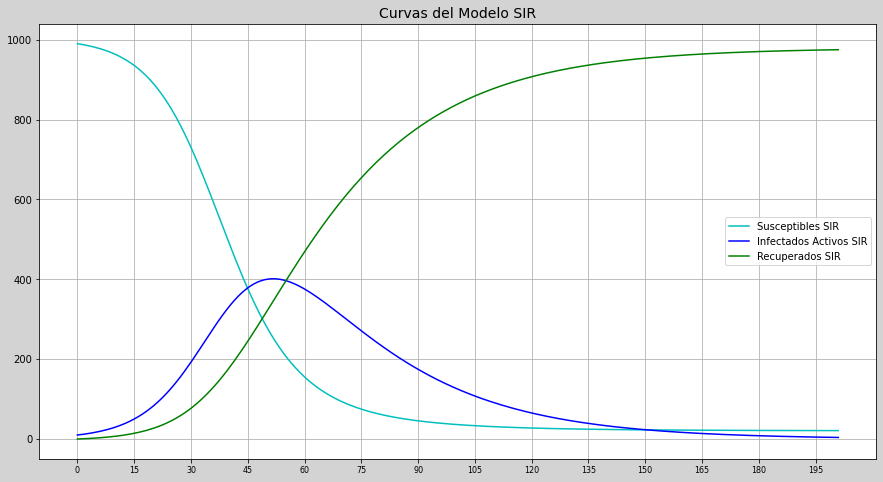

In [18]:
#@title Gráfica
plt.figure(facecolor='lightgray', figsize=(15, 8))

# Curvas del Modelo
plt.plot(t, S, 'c-', alpha=1, lw=1.5, label='Susceptibles SIR')
plt.plot(t, I, 'b-', alpha=1, lw=1.5, label='Infectados Activos SIR')
plt.plot(t, R, 'g-', alpha=1, lw=1.5, label='Recuperados SIR')

'''
# Curvas del Modelo
plt.plot(t1, S1, 'c-', alpha=1, lw=1.5, label='Susceptibles SIR')
plt.plot(t1, I1, 'b-', alpha=1, lw=1.5, label='Infectados Activos SIR')
plt.plot(t1, R1, 'g-', alpha=1, lw=1.5, label='Recuperados SIR')

plt.plot(t, I_tot, 'b:', alpha=0.4, lw=10, label='Infeccion SIR Total')
'''

# Complementos Gráficos
plt.title('Curvas del Modelo SIR', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(t), max(t), 15), fontsize=8, rotation=0)
#plt.yscale('symlog')
plt.legend(loc='best', fontsize=10)
#plt.savefig('D://sir_model_activos.png')
plt.show()

In [19]:
max(I)

401.3532033061485